In [1]:
# This script performs financial analysis and simulation on historical stock data. 

In [2]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import yfinance as yf

In [3]:
# Data Retrieval: Downloads historical stock prices for Apple, Microsoft, Google, and Amazon from Yahoo Finance.

tickers = ["AAPL", "MSFT", "GOOGL", "AMZN"]
data = yf.download(tickers, start="2019-01-01", end="2024-01-01")

[*********************100%***********************]  4 of 4 completed


In [4]:
# The full data contains many columns. However, we are interested only in the "Adjusted Close" prices,
# which reflects the stock prices adjusted for splits and dividends.

data = data['Adj Close']
data.head()  

,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2019-01-02,37.793781,76.956497,52.673550,95.673439
2019-01-03,34.029243,75.014000,51.214722,92.153831
2019-01-04,35.481922,78.769501,53.841705,96.439827
2019-01-07,35.402946,81.475502,53.734329,96.562836
2019-01-08,36.077839,82.829002,54.206287,97.262947


In [5]:
# Daily Returns Calculation: Computes daily percentage returns from adjusted closing prices.

daily_returns = data.pct_change().dropna()
daily_returns.head()   # to visualize the dataframe

,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2019-01-03,-0.099607,-0.025241,-0.027696,-0.036788
2019-01-04,0.042689,0.050064,0.051294,0.046509
2019-01-07,-0.002226,0.034353,-0.001994,0.001275
2019-01-08,0.019063,0.016612,0.008783,0.007250
2019-01-09,0.016981,0.001714,-0.003427,0.014300


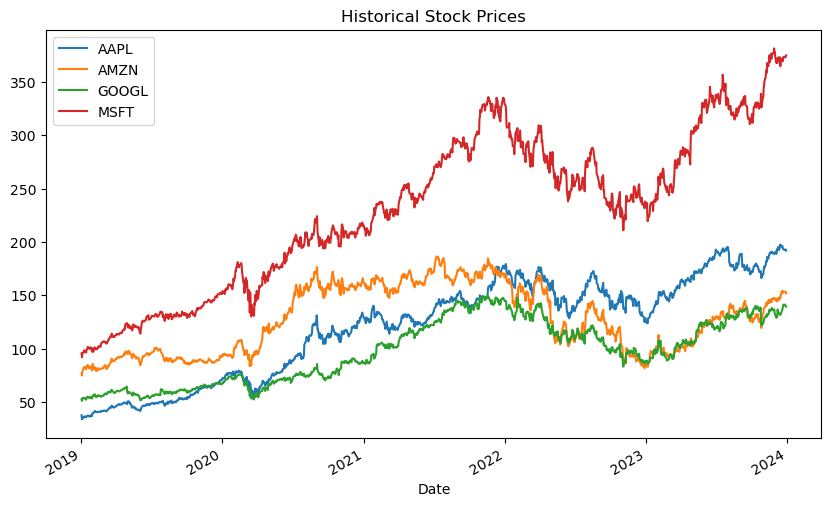

In [13]:
# Data Visualization:

data.plot(figsize=(10, 6))
plt.title("Historical Stock Prices")
plt.show()

In [7]:
# Sharpe Ratio: Measure the risk-adjusted return of the portfolio
# Here we calculate the Sharpe ratio for individual stocks

def calculate_sharpe_ratio(returns, risk_free_rate=0.01):
    mean_return = returns.mean()
    std_dev = returns.std()
    return (mean_return - risk_free_rate) / std_dev

sharpe_ratio = calculate_sharpe_ratio(daily_returns)
sharpe_ratio

AAPL    -0.418593
AMZN    -0.415229
GOOGL   -0.450328
MSFT    -0.454459
dtype: float64

In [8]:
# Calculate the daily returns of a portfolio with equal weights for each stock 
    
# Define weights (adjust as needed)
weights = np.array([0.25, 0.25, 0.25, 0.25])

# Calculate portfolio daily returns
portfolio_daily_returns = daily_returns.dot(weights)

portfolio_daily_returns.head()

Date
2019-01-03   -0.047333
2019-01-04    0.047639
2019-01-07    0.007852
2019-01-08    0.012927
2019-01-09    0.007392
dtype: float64

In [9]:
# Calculate the Sharpe Ratio for the portfolio

portfolio_sharpe_ratio = calculate_sharpe_ratio(portfolio_daily_returns)
print("Portfolio Sharpe Ratio:", portfolio_sharpe_ratio)

Portfolio Sharpe Ratio: -0.4953112538262762


In [10]:
# Define the function to calculate VaR

# Value at Risk (VaR) calculates the potential loss in value of the portfolio over a
# defined period for a given confidence interval.

def calculate_var(returns, confidence_level=0.95):
    return np.percentile(returns, (1 - confidence_level) * 100)

# Calculate the VaR at 95% confidence level for the portfolio
var_95 = calculate_var(portfolio_daily_returns, 0.95)
print("Portfolio VaR at 95% confidence level:", var_95)

Portfolio VaR at 95% confidence level: -0.028250958570076895


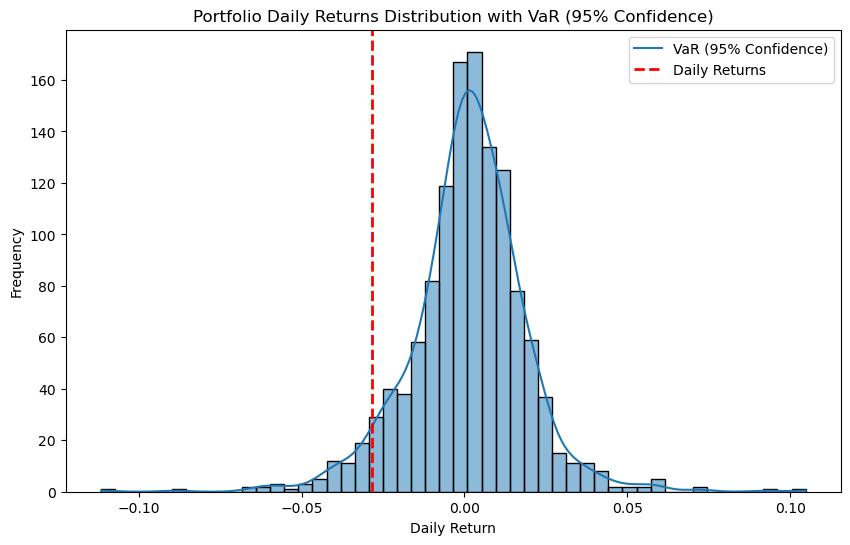

In [11]:
# Plotting
plt.figure(figsize=(10, 6))
sns.histplot(portfolio_daily_returns, bins=50, kde=True)
plt.axvline(var_95, color='r', linestyle='dashed', linewidth=2)
plt.title("Portfolio Daily Returns Distribution with VaR (95% Confidence)")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.legend(['VaR (95% Confidence)', 'Daily Returns'])
plt.show()

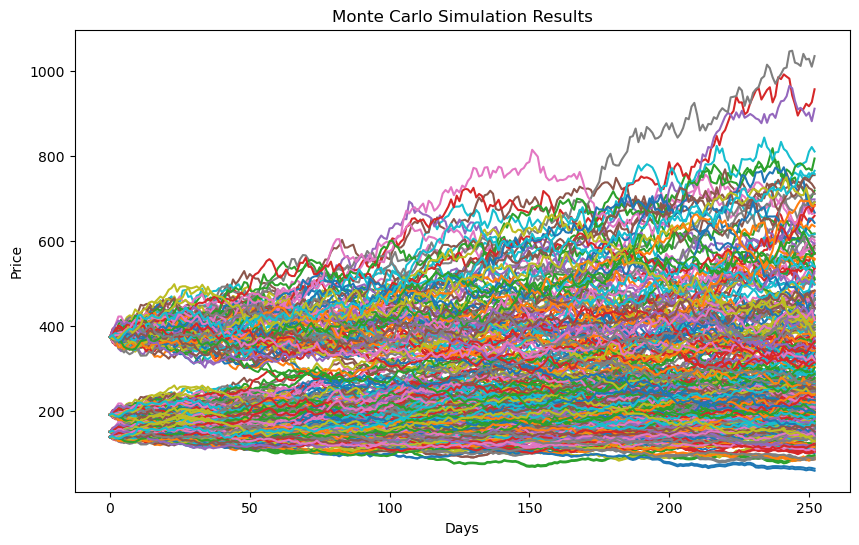

In [12]:
def monte_carlo_simulation(start_prices, days, mu, sigma, simulations=100):
    results = []
    for _ in range(simulations):
        prices = [start_prices]
        for _ in range(days):
            prices.append(prices[-1] * np.exp((mu - 0.5 * sigma**2) + sigma * np.random.normal()))
        results.append(prices)
    return np.array(results)

# Select the last available prices as the starting prices
start_prices = data.iloc[-1]

# Number of days to simulate
days = 252  # 1 year

# Calculate mean and standard deviation of daily returns
mu = daily_returns.mean()
sigma = daily_returns.std()


# Run Monte Carlo simulation
simulations = monte_carlo_simulation(start_prices, days, mu, sigma)

# Plot the simulation results
plt.figure(figsize=(10, 6))
for simulation in simulations.T:
    plt.plot(simulation)
plt.title("Monte Carlo Simulation Results")
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()